# Dimensionality Reduction

the process of reducing size of dataset while ensuring minimal (or zero) information loss
- It enhances accuracy and efficiency
- Eliminates redundant features
- Improves space consumption

## Types
1. Feature Selection
    - Filter
    - Embedded
    - Wrapped
    - Hybrid
    - Ensemble
2. Feature Extraction
    - Principal Component Analysis (PCA)
    - Linear Discriminant Analysis (LDA)
    - t-Distributed Stochastic Neighbor Embedding (t-SNE)
    - Autoencoders
    - Independent Component Analysis (ICA)

## Feature Selection
find subset of features that effectively define the data and is appropriate for the given problem

Feature selection algorithm phase is divided into two-phase such as
 1. Subset Generation: generate subset from the input dataset
 2. Subset Evaluation: check whether the generated subset is optimal or not


 ### Types
1. Filter
2. Wrapped
3. Embedded
4. Hybrid

Disadvantage
 1. might overlook hidden or latent relationships

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [92]:
data = pd.read_csv('/content/Class_Ionosphere.csv')
data.shape

(351, 35)

In [93]:
data.head()

,RRD1,RRD2,RRD3,RRD4,RRD5,RRD6,RRD7,RRD8,RRD9,RRD10,...,RRD26,RRD27,RRD28,RRD29,RRD30,RRD31,RRD32,RRD33,RRD34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [94]:
data.dtypes

RRD1       int64
RRD2       int64
RRD3     float64
RRD4     float64
RRD5     float64
RRD6     float64
RRD7     float64
RRD8     float64
RRD9     float64
RRD10    float64
RRD11    float64
RRD12    float64
RRD13    float64
RRD14    float64
RRD15    float64
RRD16    float64
RRD17    float64
RRD18    float64
RRD19    float64
RRD20    float64
RRD21    float64
RRD22    float64
RRD23    float64
RRD24    float64
RRD25    float64
RRD26    float64
RRD27    float64
RRD28    float64
RRD29    float64
RRD30    float64
RRD31    float64
RRD32    float64
RRD33    float64
RRD34    float64
Class     object
dtype: object

In [95]:
data.isnull().sum()

RRD1     0
RRD2     0
RRD3     0
RRD4     0
RRD5     0
RRD6     0
RRD7     0
RRD8     0
RRD9     0
RRD10    0
RRD11    0
RRD12    0
RRD13    0
RRD14    0
RRD15    0
RRD16    0
RRD17    0
RRD18    0
RRD19    0
RRD20    0
RRD21    0
RRD22    0
RRD23    0
RRD24    0
RRD25    0
RRD26    0
RRD27    0
RRD28    0
RRD29    0
RRD30    0
RRD31    0
RRD32    0
RRD33    0
RRD34    0
Class    0
dtype: int64

In [96]:
y = data['Class']
X = data.drop('Class', axis=1)

In [97]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

## Filter Feature selection

1. oldest
2. open-loop method: feature selection independently selects features based on their inherent properties without considering their impact on predictive model performance
3. measures the feature characteristics depending on four measurement criteria:
    - information
    - dependency
    - consistency
    - distance
4. Advantages
    - easily scalable
    - high efficiency
5. Disadvantages
    -  might select features that appear relevant on their own but fail to synergize effectively when used together within a predictive model

In [98]:
## ANOVA (Analysis of Variance):
#applied when dealing with categorical target variables and numerical features
#useful when you have a categorical target (class labels) and you want to determine the statistical significance of each feature concerning the different classes

In [99]:
from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [100]:
X_new.shape

(351, 10)

In [101]:
selected_indices = selector.get_support(indices=True)
print(selected_indices)

[ 0  2  4  6  7  8 20 28 30 32]


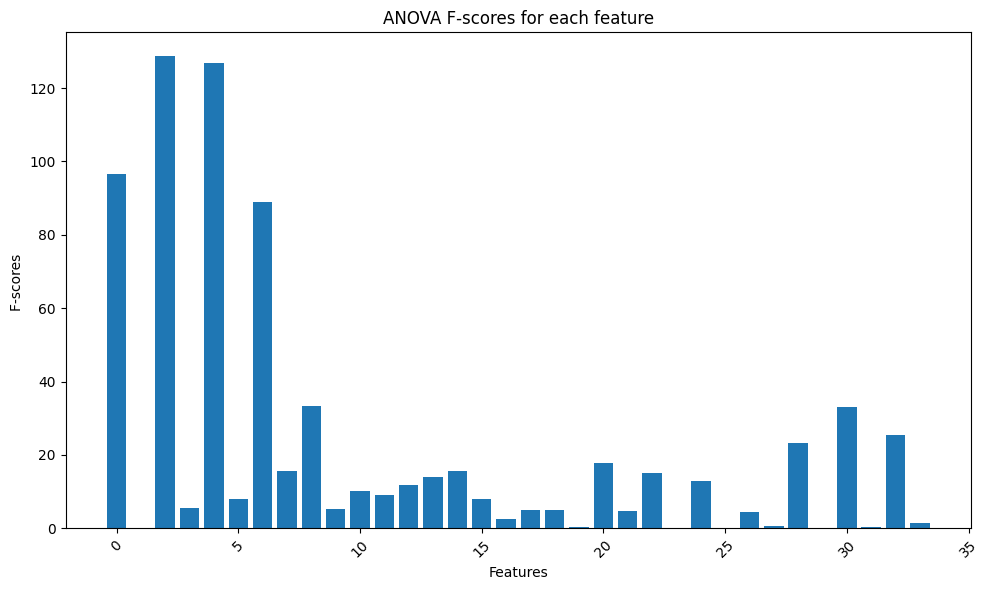

In [102]:
f_scores = selector.scores_
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(range(len(f_scores)), f_scores)

ax.set_title("ANOVA F-scores for each feature")
ax.set_xlabel("Features")
ax.set_ylabel("F-scores ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_filter = accuracy_score(y_test, y_pred)
print(f'accuracy (ANOVA): {acc_filter}')

accuracy (ANOVA): 0.9154929577464789


## Wrapped Feature selection

1. closed-loop method: uses the accuracy of the performance of learning algorithm or error rate of classification process as a criterion of feature evaluation
2. feature selection based on the performance of the learning algorithm
3. multivariate method
4. Advantages
    - high accuracy compared to the filter algorithm: selects most optimal feature for the prediction algorithm
5. Disadvantages
    - might overfit to the training data
    - more exposure to overfitting in comparison to filter approach
    - performance heavily relies on choice of underlying learning algorithm (certain algos might not work optimally with specific feature subsets)
        - Support Vector Machines (SVM)
        - k-Nearest Neighbors (k-NN)
        - Decision Trees
        - Random Forests etc.

resource:
https://www.cs.waikato.ac.nz/~mhall/thesis.pdf


In [104]:
X.shape

(351, 34)

In [105]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(random_state=42)
num_features_to_select = 10
rfe = RFE(model, n_features_to_select=num_features_to_select)

rfe.fit(X_train_, y_train_)
selected_features = rfe.support_

selected_indices = [i for i, val in enumerate(selected_features) if val]
print("Selected feature indices:", selected_indices)

Selected feature indices: [2, 3, 4, 5, 6, 7, 13, 23, 26, 27]


In [106]:
X_train_selected = X_train_.iloc[:, selected_indices]
model.fit(X_train_selected, y_train_)

X_test_selected = X_test_.iloc[:, selected_indices]
y_pred_w = model.predict(X_test_selected)

In [107]:
acc_wrapper = accuracy_score(y_test_, y_pred_w)
print(f'accuracy with wrapper filter selection: {acc_wrapper}')

accuracy with wrapper filter selection: 0.9436619718309859


## Embedded Feature selection

1. embeds feature selection in the learning algorithm
2.  uses learning algos properties to guide feature evaluation
3. combines the qualities of both filter and wrapper methods
4. Advantages
    -  more effective and more tractable than the wrapper method computationally
    - avoids the repeated execution of the classifier
5. Disadvantages
    -  might select features that appear relevant on their own but fail to synergize effectively when used together within a predictive model

In [108]:

import pandas as pd
import numpy as np

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_, y_train_)

feature_importances = clf.feature_importances_

features_df = pd.DataFrame({'Feature': X_train_.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

k = 10
selected_features = features_df.head(k)['Feature'].tolist()

X_train_selected = X_train_[selected_features]
X_test_selected = X_test_[selected_features]

In [109]:
model.fit(X_train_selected, y_train_)
y_pred_e = model.predict(X_test_selected)

In [110]:
acc_embedded = accuracy_score(y_test_, y_pred_e)
print(f'accuracy with embedded filter selection: {acc_embedded}')

accuracy with embedded filter selection: 0.9436619718309859


## Hybrid
1. developed by
    - integrating various methods (e.g. wrapper and filter)
    - two methods with the same criteria
    - two feature selection approaches

2. advantages of both methods can be inherited by combining their complementary strengths